# Tensor de inercia | Eje con brazos

[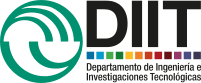](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
Calcule para el sistema de ambas $m$ (la masa de brazos y ejes es despreciable)
1. momento de inercia \\(\overline{\overline{I}}\\) respecto a A,
1. momento angular $\vec{L}\bigg\rvert_A = \overline{\overline{I}} \vec{\Omega}$ y torque $\vec{\tau} = \dot{\vec{L}}$.

La porción vertical de la barra se mantiene con rulemanes que impiden su movimiento vertical, pero posibilitan que el eje rote sin fricción con velocidad angular $\Omega$ respecto el marco inercial $O_{xyz}$.

![](figuras/o-021.png)

### Resolución

Solo se contemplarán los pesos en los extremos de las barras laterales como masas puntuales.
Por tanto se utiliza la expresión del tensor de inercia para distribuciones discretas de masa.

$$
\overline{\overline{I}}
= I_{ik} = 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
=
\begin{pmatrix}
\sum_p m_p (y_p^2 + z_p^2) & - \sum_p m_p x_p y_p & - \sum_p m_p x_p z_p \\
- \sum_p m_p y_p x_p & \sum_p m_p (x_p^2 + z_p^2)  & - \sum_p m_p y_p z_p \\
- \sum_p m_p z_p x_p & - \sum_p m_p z_p y_p & \sum_p m_p (x_p^2 + y_p^2) \\
\end{pmatrix}
$$

Debe determinarse la posición de estas masas.

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
# import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
phi, m, L = sym.symbols('phi m L', positive=True) # tilde para diferenciar densidad de radio
t = sym.symbols('t') # tiempo, todo es función del tiempo
# Omega = sym.Function('Omega')(t)
Omega = sym.Symbol('Omega')

In [3]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posiciones
m1_r = L* (sym.sin(phi)* N.z + sym.cos(phi)* ( sym.cos(Omega* t)* N.x + sym.sin(Omega* t)* N.y ) )
m2_r = L* ( sym.cos(Omega* t)* (-N.x) + sym.sin(Omega* t)* (-N.y ) )

Con estas posiciones pueden calcularse los elementos del tensor de inercia.

Primero lo momentos de inercia, en la diagonal del tensor.

In [4]:
Ixx = m* (m1_r.dot(N.y)**2 + m1_r.dot(N.z)**2 + m2_r.dot(N.y)**2 + m2_r.dot(N.z)**2 ).simplify()
Iyy = m* (m1_r.dot(N.x)**2 + m1_r.dot(N.z)**2 + m2_r.dot(N.x)**2 + m2_r.dot(N.z)**2 ).simplify()
Izz = m* (m1_r.dot(N.x)**2 + m1_r.dot(N.y)**2 + m2_r.dot(N.x)**2 + m2_r.dot(N.y)**2 ).simplify()

Y luego los productos de inercia, fuera de la diagonal.
Hay que recordar que el tensor es simétrico respecto a la diagonal, por lo que solo hay que calcular tres productos.

In [5]:
Ixy = -m* ( m1_r.dot(N.x) * m1_r.dot(N.y) + m2_r.dot(N.x) * m2_r.dot(N.y) ).simplify()
Iyx = Ixy
Ixz = -m* ( m1_r.dot(N.x) * m1_r.dot(N.z) + m2_r.dot(N.x) * m2_r.dot(N.z) ).simplify()
Izx = Ixz
Iyz = -m* ( m1_r.dot(N.y) * m1_r.dot(N.z) + m2_r.dot(N.y) * m2_r.dot(N.z) ).simplify()
Izy = Iyz

### Momento de inercia \\(\overline{\overline{I}}\\) respecto a A

In [6]:
Iik = sym.Matrix([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Izx, Izy, Izz]])
Iik_simbolo = sym.Symbol(r'\overline{\overline{I}}')
sym.Eq(Iik_simbolo, Iik, evaluate=False)

                          ⎡                                                                            
                          ⎢ 2   ⎛     2       2           2         ⎞      2   ⎛   2       ⎞           
                          ⎢L ⋅m⋅⎝- cos (φ)⋅cos (Ω⋅t) - cos (Ω⋅t) + 2⎠    -L ⋅m⋅⎝cos (φ) + 1⎠⋅sin(Ω⋅t)⋅c
                          ⎢                                                                            
                          ⎢                                                                            
                          ⎢                                                                            
                          ⎢    2   ⎛   2       ⎞                        2   ⎛   2       2             2
\overline{\overline{I}} = ⎢  -L ⋅m⋅⎝cos (φ) + 1⎠⋅sin(Ω⋅t)⋅cos(Ω⋅t)     L ⋅m⋅⎝sin (φ)⋅sin (Ω⋅t) - 2⋅sin 
                          ⎢                                                                            
                          ⎢                                     

In [17]:
Iik[2,0], Iik[0,2]

### momento angular $\vec{L}\bigg\rvert_A = \overline{\overline{I}} \vec{\Omega}$

El vector de velocidad angular $\vec{\Omega}$.

In [21]:
velocidadAngular = sym.Matrix([0,0,Omega])
sym.Eq(sym.Symbol(r'\vec{\Omega}'), velocidadAngular, evaluate= False)

               ⎡0⎤
               ⎢ ⎥
\vec{\Omega} = ⎢0⎥
               ⎢ ⎥
               ⎣Ω⎦

In [8]:
momentoAngular = Iik* velocidadAngular
momentoAngular_simplificado = [elementos.simplify() for elementos in momentoAngular]
momentoAngular_simbolo = sym.Symbol(r'\vec{L}')
sym.Eq(momentoAngular_simbolo, sym.Matrix(momentoAngular_simplificado), evaluate=False)

          ⎡ 2                                       ⎤
          ⎢L ⋅Ω⋅m⋅(sin(Ω⋅t - 2⋅φ) - sin(Ω⋅t + 2⋅φ)) ⎥
          ⎢──────────────────────────────────────── ⎥
          ⎢                   4                     ⎥
          ⎢                                         ⎥
          ⎢ 2                                       ⎥
\vec{L} = ⎢L ⋅Ω⋅m⋅(-cos(Ω⋅t - 2⋅φ) + cos(Ω⋅t + 2⋅φ))⎥
          ⎢─────────────────────────────────────────⎥
          ⎢                    4                    ⎥
          ⎢                                         ⎥
          ⎢           2     ⎛   2       ⎞           ⎥
          ⎣          L ⋅Ω⋅m⋅⎝cos (φ) + 1⎠           ⎦

###  Torque $\vec{\tau} = \dot{\vec{L}}$ si $\vec{\Omega}(t)$

In [9]:
torque = momentoAngular.diff(t)
torque_simplificado = [elementos.simplify() for elementos in torque]
torque_simbolo = sym.Symbol(r'\vec{\tau}')
sym.Eq(torque_simbolo, sym.Matrix(torque_simplificado), evaluate=False)

             ⎡ 2  2                                    ⎤
             ⎢L ⋅Ω ⋅m⋅(cos(Ω⋅t - 2⋅φ) - cos(Ω⋅t + 2⋅φ))⎥
             ⎢─────────────────────────────────────────⎥
             ⎢                    4                    ⎥
             ⎢                                         ⎥
\vec{\tau} = ⎢ 2  2                                    ⎥
             ⎢L ⋅Ω ⋅m⋅(sin(Ω⋅t - 2⋅φ) - sin(Ω⋅t + 2⋅φ))⎥
             ⎢─────────────────────────────────────────⎥
             ⎢                    4                    ⎥
             ⎢                                         ⎥
             ⎣                    0                    ⎦